# CSIT321 FYP: Counting Maize Tassels in the Wild via Deep Neural Network
## Project Members:
### - Lim Gyu Hyun
### - Lim Wei Han
### - Phua Zhon
### - Chua Ki Min
### - Guok Mee Han

## Project Description:

### Accurate counting of maize tassels is important for monitoring the growth status of maize plants. In this project, the group is expected to develop a robust deep neural network model to accurately count maize tassels in order to free humans (farmers) from intensive manual work of counting maize tassels.
### The expected outcome of this project will be a system that can automatically read maize plant image, predict the maize tassel number, and visualize the counting result with an acceptable accuracy.
### This will largely reduce the human labour and meet the need to large-scale analysis of phenotype in agriculture.


In [3]:
import pandas as pd
import numpy as np
import cv2

import matplotlib
from matplotlib import pyplot as plt, patches
from matplotlib.pyplot import figure
%matplotlib inline

import os
import scipy.io

In [4]:
annots = scipy.io.loadmat('./Sample_Images/T0006_XM_20120815160306_01')

In [5]:
annots.keys()

dict_keys(['__header__', '__version__', '__globals__', 'annotation'])

In [6]:
annots["annotation"]

array([[(array(['T0006_XM_20120815160306_01'], dtype='<U26'), array([[1912, 1443],
       [1460, 1640],
       [ 797, 1565],
       [ 219, 1633],
       [ 365,  436],
       [ 779,  443],
       [1420,  734],
       [2446,  489],
       [1864,  362],
       [2534, 1584],
       [3162, 1620],
       [2834,  615],
       [3121,  552],
       [1186,   54],
       [ 224, 2423],
       [3490, 2630],
       [3214, 2639]], dtype=uint16))]],
      dtype=[('filename', 'O'), ('bndbox', 'O')])

In [7]:
type(annots["annotation"]),annots["annotation"].shape

(numpy.ndarray, (1, 1))

In [8]:
type(annots['annotation'][0][0]),annots['annotation'][0][0].shape

(numpy.void, ())

In [9]:
annots["annotation"][0][0]

(array(['T0006_XM_20120815160306_01'], dtype='<U26'), array([[1912, 1443],
       [1460, 1640],
       [ 797, 1565],
       [ 219, 1633],
       [ 365,  436],
       [ 779,  443],
       [1420,  734],
       [2446,  489],
       [1864,  362],
       [2534, 1584],
       [3162, 1620],
       [2834,  615],
       [3121,  552],
       [1186,   54],
       [ 224, 2423],
       [3490, 2630],
       [3214, 2639]], dtype=uint16))

In [10]:
annots["annotation"][0][0]["filename"],annots["annotation"][0][0]["bndbox"]

(array(['T0006_XM_20120815160306_01'], dtype='<U26'),
 array([[1912, 1443],
        [1460, 1640],
        [ 797, 1565],
        [ 219, 1633],
        [ 365,  436],
        [ 779,  443],
        [1420,  734],
        [2446,  489],
        [1864,  362],
        [2534, 1584],
        [3162, 1620],
        [2834,  615],
        [3121,  552],
        [1186,   54],
        [ 224, 2423],
        [3490, 2630],
        [3214, 2639]], dtype=uint16))

In [11]:
flat_list = [item for sublist in annots["annotation"][0][0] for item in sublist]
flat_list

['T0006_XM_20120815160306_01',
 array([1912, 1443], dtype=uint16),
 array([1460, 1640], dtype=uint16),
 array([ 797, 1565], dtype=uint16),
 array([ 219, 1633], dtype=uint16),
 array([365, 436], dtype=uint16),
 array([779, 443], dtype=uint16),
 array([1420,  734], dtype=uint16),
 array([2446,  489], dtype=uint16),
 array([1864,  362], dtype=uint16),
 array([2534, 1584], dtype=uint16),
 array([3162, 1620], dtype=uint16),
 array([2834,  615], dtype=uint16),
 array([3121,  552], dtype=uint16),
 array([1186,   54], dtype=uint16),
 array([ 224, 2423], dtype=uint16),
 array([3490, 2630], dtype=uint16),
 array([3214, 2639], dtype=uint16)]

In [38]:
image_data=[]
bndbox = []
for item in annots["annotation"][0][0]["filename"]:
    image_data.append(item) 
for item in annots["annotation"][0][0]["bndbox"]:
    bndbox.append(item)

In [63]:
#counter = 1
#columns.append("bndbox_x")
#columns.append("bndbox_y")
#for i in range(0,int((len(image_data)-1)/2)):
    #columns.append("bndbox_x"+str(counter))
    #columns.append("bndbox_y"+str(counter))
    #counter+=1

In [64]:
columns = ["filename"]
data = pd.DataFrame([image_data], columns=columns)
data["bndbox"]=[bndbox]
data["count"] = len(bndbox)
data.head()

,filename,bndbox,count
0,T0006_XM_20120815160306_01,"[[1912, 1443], [1460, 1640], [797, 1565], [219...",17


In [57]:
img = cv2.imread('./Sample_Images/T0006_XM_20120815160306_01.jpg')
img.shape

(2736, 3648, 3)

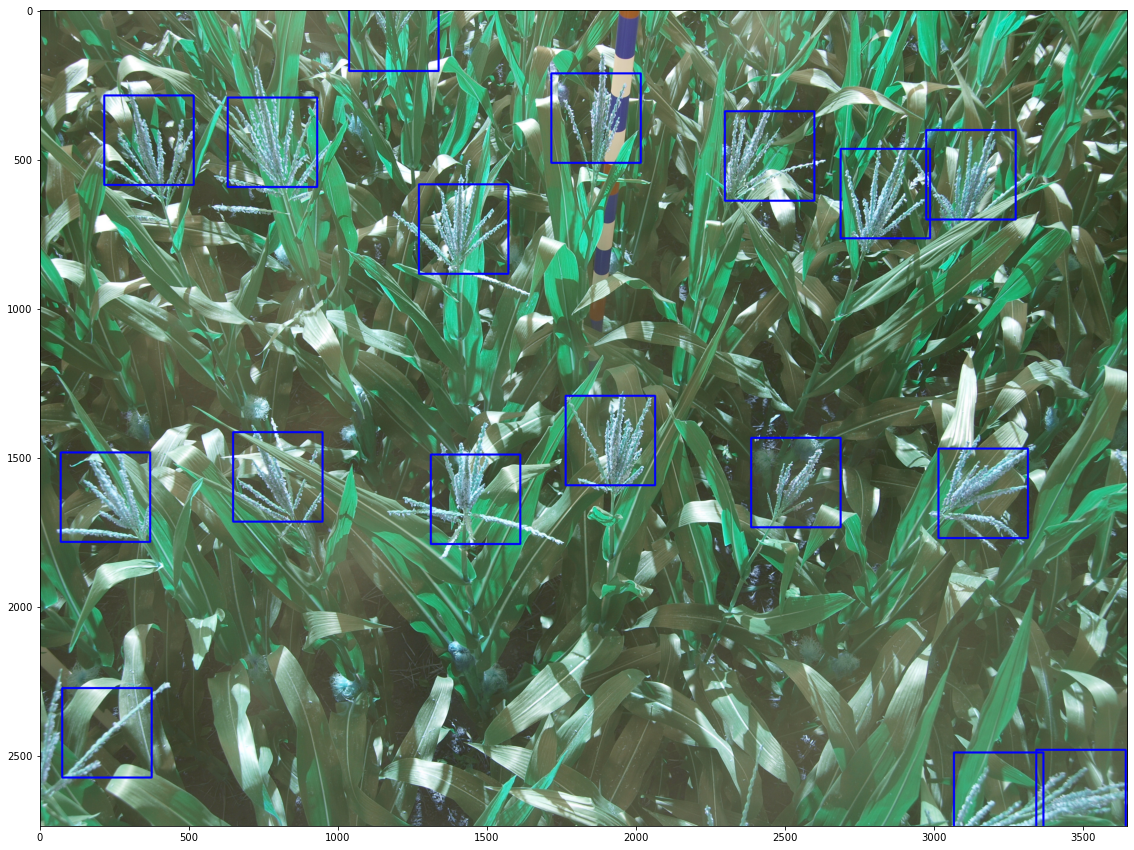

In [62]:
fig, ax = plt.subplots(1, figsize=(20, 15))
for item in bndbox:
    rect = cv2.rectangle(img,(item[0]-150,item[1]+150),(item[0]+150,item[1]-150), (0, 0, 255),5)
plt.imshow(img)